In [14]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [32]:
datos = pd.read_csv('C:/Users/brend/OneDrive/Documents/CienciaDatos/ciencia_de_datos/data/clients.csv')
datos.head()

,id,edad,genero,estado,municipio,fecha_conversion,estatus,relacion,dependientes,edo_civil,segmento
0,1186EGF,36,Masculino,Quer�taro,Quer�taro,Jul 16 2020,Cliente,Propietario,0,SOLTERO,Taxi
1,1192GMK,44,Masculino,Acatic,Jalisco,Jul 29 2020,Cliente,Propietario,0,SOLTERO,Taxi
2,1196GMK,60,Masculino,Guadalajara,Jalisco,Jul 08 2020,Cliente,Propietario,0,SOLTERO,Taxi
3,1272GMK,73,Masculino,Acatic,Jalisco,Jul 02 2020,Cliente,Propietario - Chofer,0,SOLTERO,Taxi
4,1303EGF,60,Masculino,Le�n,Guanajuato,Jul 28 2020,Cliente,Propietario,0,SOLTERO,Taxi


In [33]:
datos.columns

Index(['id', 'edad', 'genero', 'estado', 'municipio', 'fecha_conversion',
       'estatus', 'relacion', 'dependientes', 'edo_civil', 'segmento'],
      dtype='object')

In [34]:
datos_cust = datos[['id', 'edad', 'genero', 'estado', 'municipio', 'fecha_conversion',
       'estatus', 'relacion', 'dependientes', 'edo_civil', 'segmento']]
datos_cust.head()

,id,edad,genero,estado,municipio,fecha_conversion,estatus,relacion,dependientes,edo_civil,segmento
0,1186EGF,36,Masculino,Quer�taro,Quer�taro,Jul 16 2020,Cliente,Propietario,0,SOLTERO,Taxi
1,1192GMK,44,Masculino,Acatic,Jalisco,Jul 29 2020,Cliente,Propietario,0,SOLTERO,Taxi
2,1196GMK,60,Masculino,Guadalajara,Jalisco,Jul 08 2020,Cliente,Propietario,0,SOLTERO,Taxi
3,1272GMK,73,Masculino,Acatic,Jalisco,Jul 02 2020,Cliente,Propietario - Chofer,0,SOLTERO,Taxi
4,1303EGF,60,Masculino,Le�n,Guanajuato,Jul 28 2020,Cliente,Propietario,0,SOLTERO,Taxi


In [35]:

datos_cust['edad_bin'] = pd.cut(datos_cust['edad'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
datos_cust  = datos_cust.drop('edad',axis = 1)
datos_cust.head()

,id,genero,estado,municipio,fecha_conversion,estatus,relacion,dependientes,edo_civil,segmento,edad_bin
0,1186EGF,Masculino,Quer�taro,Quer�taro,Jul 16 2020,Cliente,Propietario,0,SOLTERO,Taxi,30-40
1,1192GMK,Masculino,Acatic,Jalisco,Jul 29 2020,Cliente,Propietario,0,SOLTERO,Taxi,40-50
2,1196GMK,Masculino,Guadalajara,Jalisco,Jul 08 2020,Cliente,Propietario,0,SOLTERO,Taxi,50-60
3,1272GMK,Masculino,Acatic,Jalisco,Jul 02 2020,Cliente,Propietario - Chofer,0,SOLTERO,Taxi,70-80
4,1303EGF,Masculino,Le�n,Guanajuato,Jul 28 2020,Cliente,Propietario,0,SOLTERO,Taxi,50-60


In [36]:
datos_cust.shape
datos_cust.describe()

,dependientes
count,512.000000
mean,0.035156
std,0.297962
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


In [37]:
datos_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                512 non-null    object  
 1   genero            512 non-null    object  
 2   estado            512 non-null    object  
 3   municipio         512 non-null    object  
 4   fecha_conversion  512 non-null    object  
 5   estatus           512 non-null    object  
 6   relacion          512 non-null    object  
 7   dependientes      512 non-null    int64   
 8   edo_civil         512 non-null    object  
 9   segmento          512 non-null    object  
 10  edad_bin          512 non-null    category
dtypes: category(1), int64(1), object(9)
memory usage: 41.0+ KB


In [38]:
# Checking Null values
datos_cust.isnull().sum()*100/datos_cust.shape[0]

id                  0.0
genero              0.0
estado              0.0
municipio           0.0
fecha_conversion    0.0
estatus             0.0
relacion            0.0
dependientes        0.0
edo_civil           0.0
segmento            0.0
edad_bin            0.0
dtype: float64

In [39]:
datos_cust_copy = datos_cust.copy()

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
datos_cust = datos_cust.apply(le.fit_transform)
datos_cust.head()

,id,genero,estado,municipio,fecha_conversion,estatus,relacion,dependientes,edo_civil,segmento,edad_bin
0,0,1,13,5,20,0,3,0,2,4,2
1,1,1,0,2,31,0,3,0,2,4,3
2,2,1,6,2,12,0,3,0,2,4,4
3,3,1,0,2,8,0,4,0,2,4,6
4,4,1,9,1,30,0,3,0,2,4,4


In [43]:
from kmodes.kmodes import KModes

In [44]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(datos_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2348.0


In [45]:
fitClusters_cao

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = datos_cust.columns

In [49]:
clusterCentroidsDf

,id,genero,estado,municipio,fecha_conversion,estatus,relacion,dependientes,edo_civil,segmento,edad_bin
0,1,1,6,2,33,0,3,0,2,3,3
1,0,1,13,5,6,0,4,0,2,4,2


In [50]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(datos_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 65, cost: 2384.0


In [51]:
fitClusters_huang

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,

In [52]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(datos_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2642.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2348.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5, cost: 2154.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 2035.0


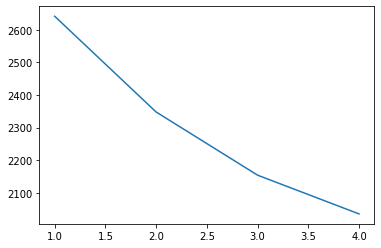

In [53]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [75]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(datos_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2858.0


In [76]:
fitClusters_cao

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [77]:
datos_cust = datos_cust_copy.reset_index()

In [78]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([datos_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [79]:
combinedDf.head()

,id,genero,estado,municipio,fecha_conversion,estatus,relacion,dependientes,edo_civil,segmento,edad_bin,cluster_predicted
0,1186EGF,Masculino,Quer�taro,Quer�taro,Jul 16 2020,Cliente,Propietario,0,SOLTERO,Taxi,30-40,1
1,1192GMK,Masculino,Acatic,Jalisco,Jul 29 2020,Cliente,Propietario,0,SOLTERO,Taxi,40-50,0
2,1196GMK,Masculino,Guadalajara,Jalisco,Jul 08 2020,Cliente,Propietario,0,SOLTERO,Taxi,50-60,0
3,1272GMK,Masculino,Acatic,Jalisco,Jul 02 2020,Cliente,Propietario - Chofer,0,SOLTERO,Taxi,70-80,1
4,1303EGF,Masculino,Le�n,Guanajuato,Jul 28 2020,Cliente,Propietario,0,SOLTERO,Taxi,50-60,0


In [80]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [81]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1 to 510
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 357 non-null    object  
 1   genero             357 non-null    object  
 2   estado             357 non-null    object  
 3   municipio          357 non-null    object  
 4   fecha_conversion   357 non-null    object  
 5   estatus            357 non-null    object  
 6   relacion           357 non-null    object  
 7   dependientes       357 non-null    int64   
 8   edo_civil          357 non-null    object  
 9   segmento           357 non-null    object  
 10  edad_bin           357 non-null    category
 11  cluster_predicted  357 non-null    uint16  
dtypes: category(1), int64(1), object(9), uint16(1)
memory usage: 32.1+ KB


In [82]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 511
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 155 non-null    object  
 1   genero             155 non-null    object  
 2   estado             155 non-null    object  
 3   municipio          155 non-null    object  
 4   fecha_conversion   155 non-null    object  
 5   estatus            155 non-null    object  
 6   relacion           155 non-null    object  
 7   dependientes       155 non-null    int64   
 8   edo_civil          155 non-null    object  
 9   segmento           155 non-null    object  
 10  edad_bin           155 non-null    category
 11  cluster_predicted  155 non-null    uint16  
dtypes: category(1), int64(1), object(9), uint16(1)
memory usage: 14.1+ KB


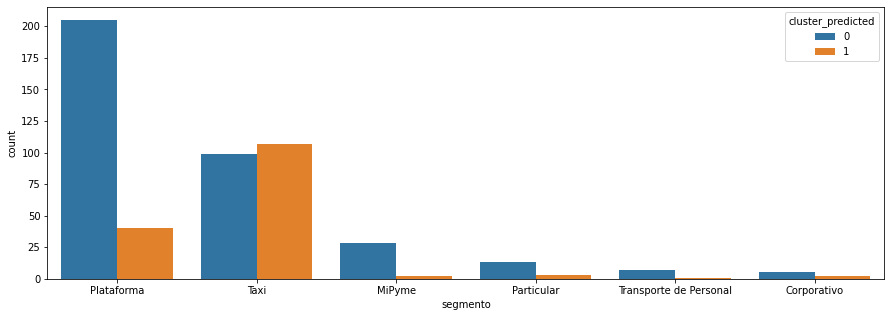

In [83]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['segmento'],order=combinedDf['segmento'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

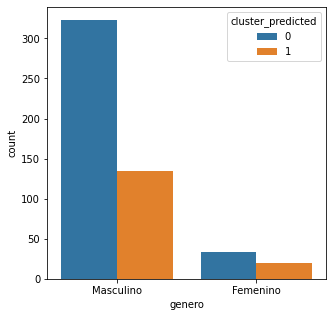

In [84]:
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['genero'],order=combinedDf['genero'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()